In [1]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import os

from lib import ess_gen_farina, ess_parse_farina

In [2]:
fs = 48000  # Sampling Frequency [Hz]

f1 = 20  # Initial frequency [Hz]
f2 = 20000  # Final frequency [Hz]

T_sweep = 10  # Sweep duration [sec.]
T_idle = 3  # Idle duration [sec.]

fade_in = int(0.100 * fs)  # fade-in window of 100 ms [samples]

t_sweep = np.arange(0, (T_sweep + T_idle) * fs) / fs  # Time vector [sec.]

In [3]:
sweep, inverse = ess_gen_farina(f1, f2, T_sweep, T_idle, fs,
                                fade_in=fade_in,
                                cut_zerocross=True)

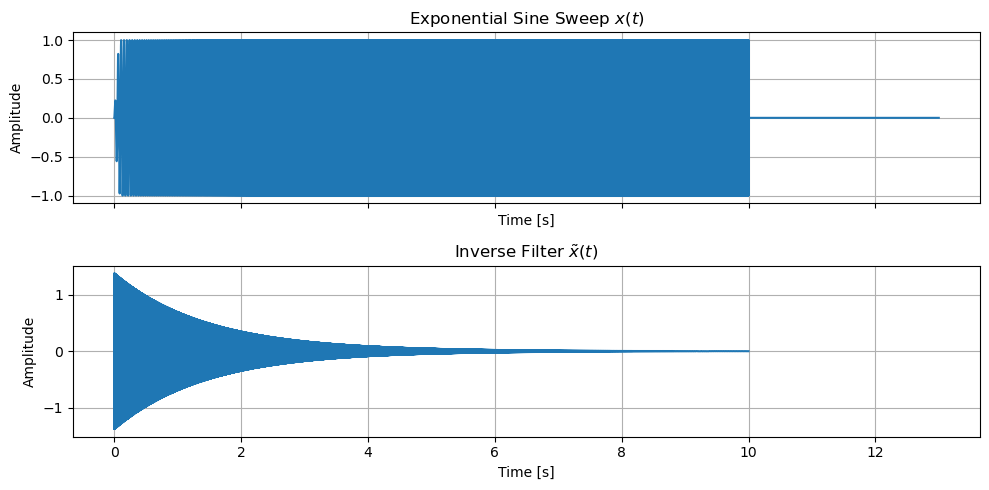

In [4]:
fig, axs = plt.subplots(2, 1, figsize=(10, 5), sharex=True)
axs[0].plot(t_sweep, sweep)
axs[0].set_title('Exponential Sine Sweep $x(t)$')
axs[0].set_xlabel('Time [s]')
axs[0].set_ylabel('Amplitude')
axs[0].grid()

axs[1].plot(np.arange(0, int(T_sweep * fs)) / fs, inverse)
axs[1].set_title('Inverse Filter $\\tilde{x}(t)$')
axs[1].set_xlabel('Time [s]')
axs[1].set_ylabel('Amplitude')
axs[1].grid()
fig.tight_layout()

In [5]:
#loop over all wav files in this folder and its subfolders
for root, dirs, files in os.walk(os.getcwd()):
    for file in files:
        if file.endswith(".wav"):
            #read the wav file
            measured_sweep = sf.read(os.path.join(root, file))[0]
            
            #perform deconvolution
            h = ess_parse_farina(measured_sweep, inverse, T_sweep, T_idle, fs, causality=True)

            #save the RIR
            sf.write(os.path.join(root, file[:-4] + '_RIR.wav'), h, fs, subtype='PCM_24')

AttributeError: 'tuple' object has no attribute 'ndim'

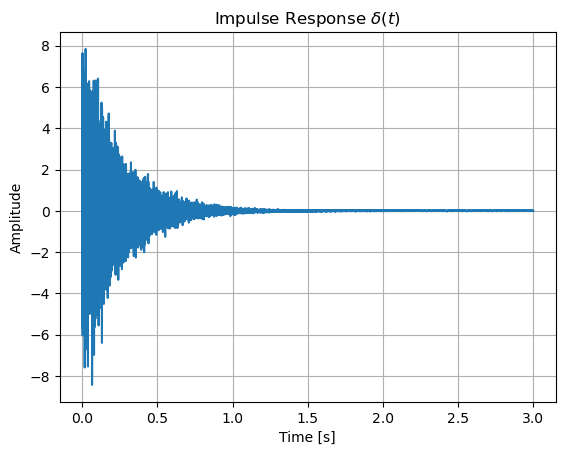

In [6]:
plt.figure()
t = np.arange(0, T_idle * fs) / fs
plt.plot(t, h)
plt.title('Impulse Response $\\delta(t)$')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [7]:
#sf.write('sweep_192KHZ.wav', sweep, fs, subtype='PCM_24')
#sf.write("inverse_192KHZ.wav", inverse, fs, subtype='PCM_24')